In [1]:
# Simple linear Regression  
# Components of the regression equation 
# Influential points and outliers
# Analysis of residuals and tests of assumptions: 
# -linearity, homoscedasticity, normality, and independence of residuals
# Regression t-test and t-interval for the slope
# Proper interpretation of the confidence interval
# Estimate parameter based on a defined value of the predictor variable: 
#  -calculate conditional mean 
#  -build a t-interval for the parameter
#  -build a prediction interval for the variable
# Population correlation hypothesis t-tests

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson

In [3]:
# Data

# define the dataset (since execution state was reset)

# Orion car age and price dataset
# x_values = np.array([5, 4, 6, 5, 5, 5, 6, 6, 2, 7, 7])
# y_values = np.array([85, 103, 70, 82, 89, 98, 66, 95, 169, 70, 48])

# tax and energy efficiency dataset
# x_values = np.array([3.1, 3.2, 3.7, 4.3, 4.0, 5.5, 6.7, 7.4, 7.4, 10.6])
# y_values = np.array([98.1, 94.7, 92.0, 89.8, 87.5, 85.0, 82.0, 77.8, 72.1, 53.5])

# corvette age and prices
# x_values = np.array([6, 6, 6, 2, 2, 5, 4, 5, 1, 4])
# y_values = np.array([290, 280, 295, 425, 384, 315, 355, 328, 425, 325])


# Student-to-Faculty (S/F) Ratio and Graduation Rate (%)
x_values = np.array([16, 17, 20, 17, 17, 17, 19, 10, 22, 18])
y_values = np.array([45, 46, 55, 50, 70, 66, 50, 26, 47, 60])


Sample Data Points:
(16, 45)
(17, 46)
(20, 55)
(17, 50)
(17, 70)


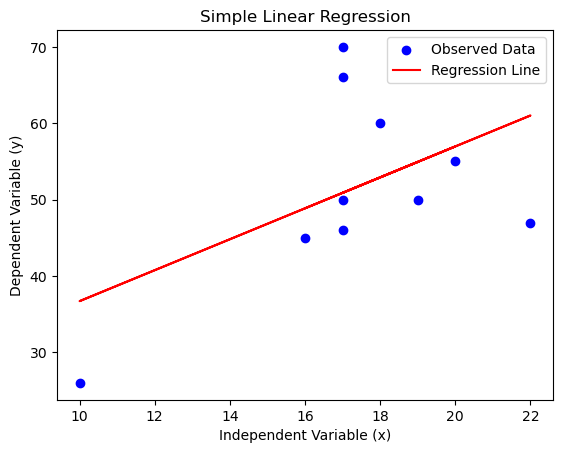

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.829
Date:                Wed, 26 Mar 2025   Prob (F-statistic):              0.131
Time:                        18:31:30   Log-Likelihood:                -37.328
No. Observations:                  10   AIC:                             78.66
Df Residuals:                       8   BIC:                             79.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4484     21.145      0.778      0.4

C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Simple linear Regression Model 
# Perform simple linear regression using Ordinary Least Squares (OLS)

#     Parameters:
#     x (array-like): Independent variable
#     y (array-like): Dependent variable 
#     show_points (bool): If True, displays a few (x, y) data points.
#     Returns:
#     model: Fitted regression model
#     summary: Regression summary results

def simple_linear_regression(x, y, show_points=False):
   
    # Convert to NumPy arrays (if not already)
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)

    # Plot the data and regression line
    plt.scatter(x, y, label='Observed Data', color='blue')
    plt.plot(x, y_pred, label='Regression Line', color='red')
    plt.xlabel('Independent Variable (x)')
    plt.ylabel('Dependent Variable (y)')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()

    # Return model and summary
    return model, model.summary()

# Run regression analysis with data points displayed
model, summary = simple_linear_regression(x_values, y_values, show_points=True)

# Print regression summary
print(summary)

In [5]:
# Simple linear Regression Model 
#  Perform residual diagnostics: homoscedasticity, normality, and independence tests.
def analyze_residuals(x, y, show_points=False): 
    x = np.array(x)
    y = np.array(y)

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Homoscedasticity Tests
    bp_test = het_breuschpagan(residuals, X)  # Breusch-Pagan test
    gq_test = het_goldfeldquandt(residuals, X)  # Goldfeld-Quandt test

    print("\nHomoscedasticity Tests:")
    print(f"Breusch-Pagan Test p-value: {bp_test[1]:.4f} (p < 0.05 suggests heteroscedasticity)")
    print(f"Goldfeld-Quandt Test p-value: {gq_test[1]:.4f} (p < 0.05 suggests heteroscedasticity)")

    # Test for Independence of Residuals (Durbin-Watson)
    dw_statistic = durbin_watson(residuals)
    print("\nTest for Independence of Residuals:")
    print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
    if dw_statistic < 1.5:
        print(" - Possible positive autocorrelation (residuals are not independent).")
    elif 1.5 <= dw_statistic <= 2.5:
        print(" - Residuals appear to be independent (good).")
    else:
        print(" - Possible negative autocorrelation.")

    # Residual Plot
    plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (Check for Homoscedasticity)')
    plt.show()

    # QQ Plot of Residuals (Check for Normality)
    sm.qqplot(residuals, line='45', fit=True)
    plt.title('QQ Plot of Residuals (Check for Normality)')
    plt.show()

    return residuals, y_pred


Homoscedasticity Tests:
Breusch-Pagan Test p-value: 0.9776 (p < 0.05 suggests heteroscedasticity)
Goldfeld-Quandt Test p-value: 0.3682 (p < 0.05 suggests heteroscedasticity)

Test for Independence of Residuals:
Durbin-Watson Statistic: 1.2890
 - Possible positive autocorrelation (residuals are not independent).


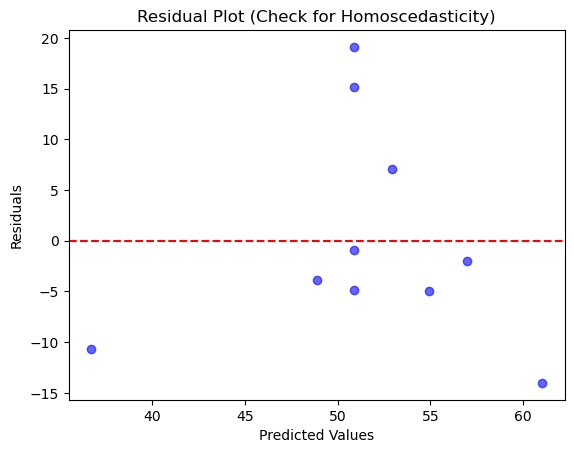

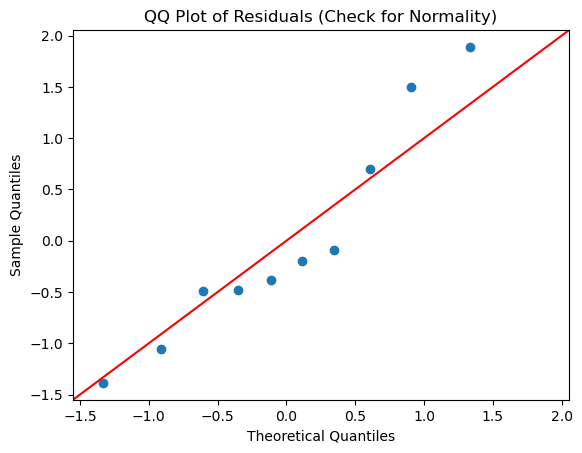


Sample Data Points:
(16, 45)
(17, 46)
(20, 55)
(17, 50)
(17, 70)

Potential Outliers (Std Residuals > ±2):
Empty DataFrame
Columns: [x, y, Residuals, Std Residuals, Leverage, Cook’s Distance, DFFITS, DFBETAS]
Index: []

Potential High Leverage Points (Leverage > 2(k+1)/n):
    x   y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
7  10  26 -10.709421      -1.743446  0.704881         3.629987 -3.200799   

    DFBETAS  
7  2.965073  

Potential Influential Points (Cook’s Distance > 4/n):
    x   y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
7  10  26 -10.709421      -1.743446  0.704881         3.629987 -3.200799   
8  22  47 -14.022701      -1.539086  0.350738         0.639820 -1.261223   

    DFBETAS  
7  2.965073  
8 -1.066377  


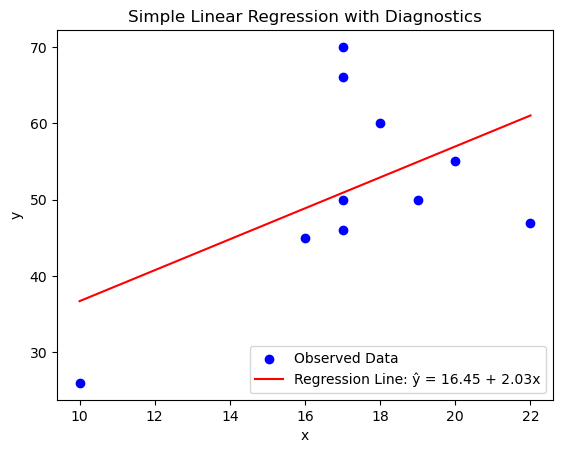

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.829
Date:                Wed, 26 Mar 2025   Prob (F-statistic):              0.131
Time:                        18:31:31   Log-Likelihood:                -37.328
No. Observations:                  10   AIC:                             78.66
Df Residuals:                       8   BIC:                             79.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4484     21.145      0.778      0.4

C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Simple linear Regression Model 
# Perform simple linear regression and check for outliers & influential points.
def run_regression(x, y, show_points=False):
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)
    residuals = y - y_pred  # Compute residuals

    # Influence measures
    influence = model.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]
    dffits = influence.dffits[0]
    dfbetas = influence.dfbetas[:, 1]

    # Create DataFrame for diagnostics
    influence_df = pd.DataFrame({
        "x": x, "y": y, 
        "Residuals": residuals,
        "Std Residuals": standardized_residuals,
        "Leverage": leverage,
        "Cook’s Distance": cooks_d,
        "DFFITS": dffits,
        "DFBETAS": dfbetas
    })

    # Identify potential issues
    print("\nPotential Outliers (Std Residuals > ±2):")
    print(influence_df[np.abs(influence_df["Std Residuals"]) > 2])

    print("\nPotential High Leverage Points (Leverage > 2(k+1)/n):")
    leverage_threshold = 2 * (2 / len(x))  # (k+1) = 2 (intercept + slope)
    print(influence_df[influence_df["Leverage"] > leverage_threshold])

    print("\nPotential Influential Points (Cook’s Distance > 4/n):")
    cooks_threshold = 4 / len(x)
    print(influence_df[influence_df["Cook’s Distance"] > cooks_threshold])

    # Generate regression plot
    x_range = np.linspace(min(x), max(x), 100)
    y_range = model.params[0] + model.params[1] * x_range

    plt.scatter(x, y, color='blue', label='Observed Data')
    plt.plot(x_range, y_range, color='red', label=f'Regression Line: ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Simple Linear Regression with Diagnostics')
    plt.legend()
    plt.show()

    return model, model.summary(), influence_df

# Step 1: Run residual tests
residuals, y_pred = analyze_residuals(x_values, y_values, show_points=True)

# Step 2: Run regression
model, summary, influence_df = run_regression(x_values, y_values, show_points=True)

# Display summary
print(summary)


Homoscedasticity Tests:
Breusch-Pagan Test p-value: 0.9776 (p < 0.05 suggests heteroscedasticity)
Goldfeld-Quandt Test p-value: 0.3682 (p < 0.05 suggests heteroscedasticity)

Test for Independence of Residuals:
Durbin-Watson Statistic: 1.2890
 - Possible positive autocorrelation (residuals are not independent).


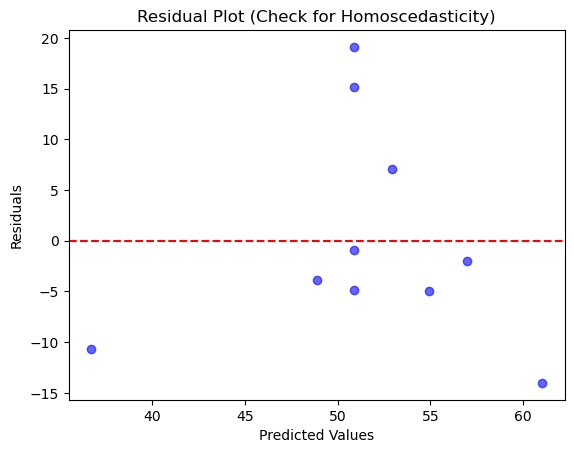

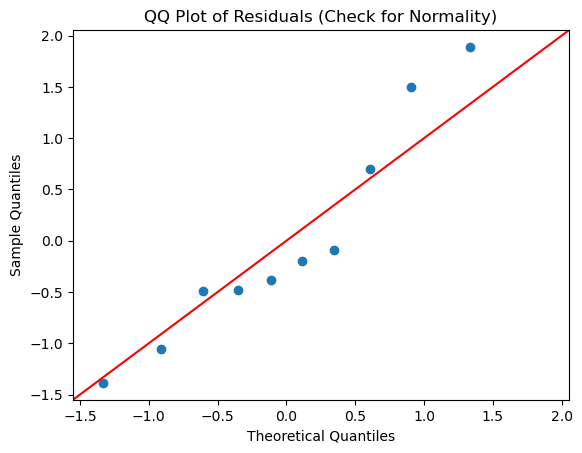


Sample Data Points:
(16, 45)
(17, 46)
(20, 55)
(17, 50)
(17, 70)

Potential Outliers (Std Residuals > ±2):
Empty DataFrame
Columns: [x, y, Residuals, Std Residuals, Leverage, Cook’s Distance, DFFITS, DFBETAS]
Index: []

Potential High Leverage Points (Leverage > 2(k+1)/n):
    x   y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
7  10  26 -10.709421      -1.743446  0.704881         3.629987 -3.200799   

    DFBETAS  
7  2.965073  

Potential Influential Points (Cook’s Distance > 4/n):
    x   y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
7  10  26 -10.709421      -1.743446  0.704881         3.629987 -3.200799   
8  22  47 -14.022701      -1.539086  0.350738         0.639820 -1.261223   

    DFBETAS  
7  2.965073  
8 -1.066377  


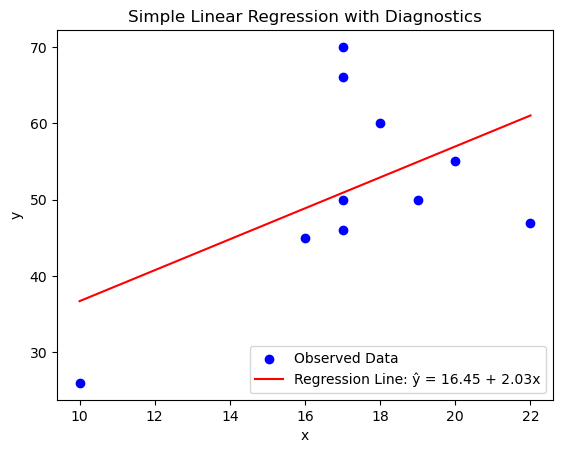


Sums of Squares:
SST (Total Sum of Squares): 1384.50
SSR (Regression Sum of Squares): 361.66
SSE (Error Sum of Squares): 1022.84

Check: SST ≈ SSR + SSE ? Yes


C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# Simple linear Regression Model 
# Sum of Squares
def compute_sums_of_squares(y, y_pred):
    """
    Compute Total Sum of Squares (SST), Regression Sum of Squares (SSR), 
    and Error Sum of Squares (SSE).

    Parameters:
    y (array-like): Observed values
    y_pred (array-like): Predicted values

    Returns:
    tuple: (SST, SSR, SSE)
    """
    y_mean = np.mean(y)
    SST = np.sum((y - y_mean) ** 2)  # Total Sum of Squares
    SSR = np.sum((y_pred - y_mean) ** 2)  # Regression Sum of Squares
    SSE = np.sum((y - y_pred) ** 2)  # Error Sum of Squares
    
    return SST, SSR, SSE

# Step 1: Run residual tests
residuals, y_pred = analyze_residuals(x_values, y_values, show_points=True)

# Step 2: Run regression
model, summary, influence_df = run_regression(x_values, y_values, show_points=True)

# Compute SST, SSR, and SSE
SST, SSR, SSE = compute_sums_of_squares(y_values, y_pred)

# Print the results
print("\nSums of Squares:")
print(f"SST (Total Sum of Squares): {SST:.2f}")
print(f"SSR (Regression Sum of Squares): {SSR:.2f}")
print(f"SSE (Error Sum of Squares): {SSE:.2f}")

# Verify SST = SSR + SSE
print(f"\nCheck: SST ≈ SSR + SSE ? {'Yes' if np.isclose(SST, SSR + SSE) else 'No'}")


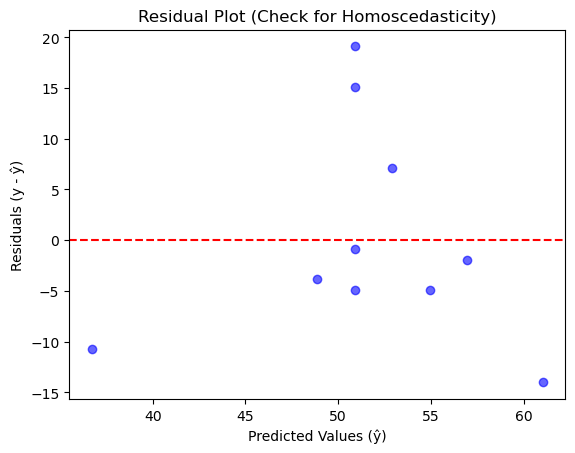

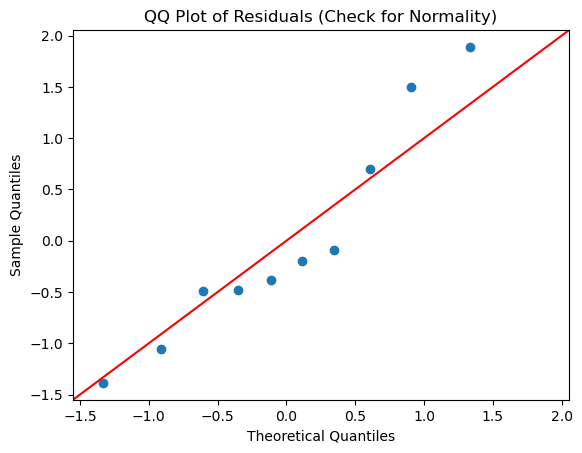


Durbin-Watson Statistic: 1.2890
 - Possible positive autocorrelation (residuals are not independent).


In [8]:
# Simple linear Regression Model 
# Analysis of residuals (same codde but outside the funciton)
# Residual Plot (Check for Homoscedasticity)
plt.scatter(model.fittedvalues, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (ŷ)')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot (Check for Homoscedasticity)')
plt.show()

# Normal Probability Plot (QQ Plot for Normality Check)
import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals (Check for Normality)')
plt.show()

# Durbin-Watson Test (Check for Independence of Residuals)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)

# Print Durbin-Watson Test result
print(f"\nDurbin-Watson Statistic: {dw_statistic:.4f}")
if dw_statistic < 1.5:
    print(" - Possible positive autocorrelation (residuals are not independent).")
elif 1.5 <= dw_statistic <= 2.5:
    print(" - Residuals appear to be independent (good).")
else:
    print(" - Possible negative autocorrelation.")


In [20]:
# Simple linear Regression Model 
# Compute Standard Error of the Estimate (S_e) (ak standard deviation of the residuals)
def compute_standard_error_of_estimate(residuals, n, k=1):
    """
    Compute the standard error of the estimate (S_e), which measures 
    the standard deviation of residuals.

    Parameters:
    residuals (array-like): Residual values (y - y_pred)
    n (int): Number of observations
    k (int): Number of predictors (default=1 for simple regression)

    Returns:
    float: Standard error of the estimate (S_e)
    """
    SSE = np.sum(residuals**2)  # Sum of Squared Errors
    df_error = n - (k + 1)  # Degrees of freedom (n - k - 1)
    S_e = np.sqrt(SSE / df_error)  # Standard error of the estimate
    return S_e

# Extract residuals from the model
residuals = model.resid

# Compute the standard error of the estimate
S_e = compute_standard_error_of_estimate(residuals, len(x_values))

# Print the result
print(f"\nStandard Error of the Estimate (S_e): {S_e:.4f}")
print(f"\nOn average, the actual (observed)  y-values deviate from the predicted values by about {S_e:.4f} units.\n")
print(f"Roughly speaking, the predicted y-value differs from the observed y-value by about {S_e:.4f} units.\n")
print(f"This is the standard deviaion of the residuals.")


Standard Error of the Estimate (S_e): 11.3073

On average, the actual (observed)  y-values deviate from the predicted values by about 11.3073 units.

Roughly speaking, the predicted y-value differs from the observed y-value by about 11.3073 units.

This is the standard deviaion of the residuals.


In [10]:
# Simple linear Regression Model 
# Regression t-test and t-interval for the slope
alpha = 0.05
confidence = 1-alpha

In [11]:
# Function to perform the regression t-test for the slope with left-, right-, and two-tailed tests
def regression_t_test(x, y, alpha=0.05):
    """
    Conduct a t-test for the slope of the regression line with left-tailed, right-tailed, and two-tailed tests.

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    alpha (float): Significance level (default: 0.05)

    Returns:
    str: Formatted string containing the t-test results and hypothesis decisions.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Extract t-statistic and p-value for the slope coefficient
    t_statistic = model.tvalues[1]  # Index 1 corresponds to the slope coefficient
    p_value = model.pvalues[1]  # Index 1 corresponds to the slope coefficient

    # Degrees of freedom: n - k - 1 (k=1 for simple regression)
    df = len(x) - 2

    # Compute critical t-values
    t_critical_two_tailed = stats.t.ppf(1 - alpha / 2, df)  # Two-tailed test
    t_critical_left = stats.t.ppf(alpha, df)  # Left-tailed test
    t_critical_right = stats.t.ppf(1 - alpha, df)  # Right-tailed test

    # Compute p-values
    p_value_two_tailed = p_value  # Already two-tailed from statsmodels
    p_value_left = p_value / 2 if t_statistic < 0 else 1 - (p_value / 2)  # Left-tailed p-value
    p_value_right = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)  # Right-tailed p-value

    # Decision rules
    reject_null_two_tailed = abs(t_statistic) > t_critical_two_tailed or p_value_two_tailed < alpha
    reject_null_left = t_statistic < t_critical_left or p_value_left < alpha
    reject_null_right = t_statistic > t_critical_right or p_value_right < alpha

    return f"""\nRegression t-Test for the Slope at the {alpha} significance level:
    - Sample Size (n): {len(x)}
    - Degrees of Freedom (df): {df}
    - t-statistic: {t_statistic:.4f}
    - Alpha: {alpha}
    
    - Is there sufficient evidence to conclude that the slope of the population regression line is not 0?
    - If so, reject the null. Rejecting the null means the x-variable is useful as a (linear) predictor.  
    - Otherwise, predictor variable is not useful.

    Two-Tailed Test:
    - Critical t-value: ±{t_critical_two_tailed:.4f}
    - p-value: {p_value_two_tailed:.4e}
    - Decision: {"Reject H0" if reject_null_two_tailed else "Fail to Reject H0"}

    Left-Tailed Test (H1: β1 < 0):
    - Critical t-value: {t_critical_left:.4f}
    - p-value: {p_value_left:.4e}
    - Decision: {"Reject H0" if reject_null_left else "Fail to Reject H0"}

    Right-Tailed Test (H1: β1 > 0):
    - Critical t-value: {t_critical_right:.4f}
    - p-value: {p_value_right:.4e}
    - Decision: {"Reject H0" if reject_null_right else "Fail to Reject H0"}
    """

# Run the updated regression t-test for the slope
regression_t_test_results = regression_t_test(x_values, y_values, alpha)

# Display results
print(regression_t_test_results)



Regression t-Test for the Slope at the 0.05 significance level:
    - Sample Size (n): 10
    - Degrees of Freedom (df): 8
    - t-statistic: 1.6819
    - Alpha: 0.05
    
    - Is there sufficient evidence to conclude that the slope of the population regression line is not 0?
    - If so, reject the null. Rejecting the null means the x-variable is useful as a (linear) predictor.  
    - Otherwise, predictor variable is not useful.

    Two-Tailed Test:
    - Critical t-value: ±2.3060
    - p-value: 1.3110e-01
    - Decision: Fail to Reject H0

    Left-Tailed Test (H1: β1 < 0):
    - Critical t-value: -1.8595
    - p-value: 9.3445e-01
    - Decision: Fail to Reject H0

    Right-Tailed Test (H1: β1 > 0):
    - Critical t-value: 1.8595
    - p-value: 6.5549e-02
    - Decision: Fail to Reject H0
    


In [12]:
# Simple linear Regression Model 

# Function to compute the confidence interval for the slope with interpretation
def confidence_interval_slope(x, y, confidence=confidence):
    """
    Compute the confidence interval for the slope of the regression line and provide an interpretation.

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    confidence (float): Confidence level (default: 95%)

    Returns:
    str: Formatted string containing the confidence interval and its correct interpretation.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Extract slope and its standard error
    slope = model.params[1]
    std_error = model.bse[1]

    # Compute critical t-value for given confidence level
    df = len(x) - 2  # Degrees of freedom
    t_critical = stats.t.ppf((1 + confidence) / 2, df)

    # Compute margin of error
    margin_of_error = t_critical * std_error

    # Compute confidence interval
    lower_bound = slope - margin_of_error
    upper_bound = slope + margin_of_error

    # Proper interpretation of the confidence interval
    interpretation = (
        f"Based on this sample, we computed a {confidence*100:.1f}% confidence interval for the slope "
        f"of the population regression line: ({lower_bound:.4f}, {upper_bound:.4f}). "
        f"This interval does not provide a probability statement about the true slope itself. "
        f"Instead, if we were to repeatedly sample from the population and construct similar intervals, "
        f"approximately {confidence*100:.1f}% of them would contain the true slope."
    )

    return f"""\nConfidence Interval for the Slope:
    - Confidence Level: {confidence*100:.1f}%
    - Lower Bound: {lower_bound:.4f}
    - Upper Bound: {upper_bound:.4f}
    - Interpretation: {interpretation}
    """

# Compute confidence interval for the slope with interpretation
ci_slope_interpreted = confidence_interval_slope(x_values, y_values)

# Display results
print(ci_slope_interpreted)


Confidence Interval for the Slope:
    - Confidence Level: 95.0%
    - Lower Bound: -0.7519
    - Upper Bound: 4.8041
    - Interpretation: Based on this sample, we computed a 95.0% confidence interval for the slope of the population regression line: (-0.7519, 4.8041). This interval does not provide a probability statement about the true slope itself. Instead, if we were to repeatedly sample from the population and construct similar intervals, approximately 95.0% of them would contain the true slope.
    


In [13]:
# Simple linear Regression Model 
# Estimates the average response value for all instances of x (all predictor variables with x=??)
# Interval estimates of the parameters 

# define the desired predictor value (x-value)
xp = 17

# Function to compute the point estimate and confidence interval for the parameter (population)
def conditional_mean_t_interval(x, y, xp, confidence=confidence):
    """
    Compute the confidence interval for the mean response (ŷ) at a given predictor value (xp).

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    xp (float): Specific predictor value for estimation
    confidence (float): Confidence level (default: 95%)

    Returns:
    str: Formatted string containing the confidence interval and its interpretation.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Compute the point estimate ŷ = b0 + b1 * xp
    point_estimate = model.params[0] + model.params[1] * xp

    # Compute standard error for the estimate
    n = len(x)  # Sample size
    df = n - 2  # Degrees of freedom

    # Standard error of ŷ
    x_mean = np.mean(x)
    Sxx = np.sum((x - x_mean) ** 2)
    SE_yhat = np.sqrt(model.mse_resid * (1/n + ((xp - x_mean) ** 2) / Sxx))

    # Compute critical t-value
    t_critical = stats.t.ppf((1 + confidence) / 2, df)

    # Compute margin of error
    margin_of_error = t_critical * SE_yhat

    # Compute confidence interval
    lower_bound = point_estimate - margin_of_error
    upper_bound = point_estimate + margin_of_error

    # Generalized interpretation statement
    interpretation = (
        f"Based on this sample, we computed a {confidence*100:.1f}% confidence interval "
        f"for the mean response at x = {xp}: ({lower_bound:.2f}, {upper_bound:.2f}). "
        f"This interval estimates the average response for all instances where x = {xp}, "
        f"not the response for a specific individual case."
    )

    return f"""\nConditional Mean Confidence Interval:
    - Predictor Value (xp): {xp} 
    - Confidence Level: {confidence*100:.1f}%
    - Point Estimate (ŷ): {point_estimate:.2f}
    - Lower Bound: {lower_bound:.2f}
    - Upper Bound: {upper_bound:.2f}
    - Interpretation: {interpretation}
    """
   

# Compute the conditional mean confidence interval
conditional_mean_result = conditional_mean_t_interval(x_values, y_values, xp, confidence)

# Display the results
print(conditional_mean_result)


Conditional Mean Confidence Interval:
    - Predictor Value (xp): 17 
    - Confidence Level: 95.0%
    - Point Estimate (ŷ): 50.89
    - Lower Bound: 42.60
    - Upper Bound: 59.18
    - Interpretation: Based on this sample, we computed a 95.0% confidence interval for the mean response at x = 17: (42.60, 59.18). This interval estimates the average response for all instances where x = 17, not the response for a specific individual case.
    


In [14]:
# Simple linear Regression Model 
# Estimates the average response value for a specific instance of x (a specific predictor variable with x=??)

# Function to compute the prediction interval
def prediction_interval(x, y, xp, confidence=confidence):
    """
    Compute the prediction interval for an individual response (ŷ) at a given predictor value (xp).

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    xp (float): Specific predictor value for prediction
    confidence (float): Confidence level (default: 95%)

    Returns:
    str: Formatted string containing the prediction interval and its interpretation.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Compute the point estimate ŷ = b0 + b1 * xp
    point_estimate = model.params[0] + model.params[1] * xp

    # Compute standard error for the prediction
    n = len(x)  # Sample size
    df = n - 2  # Degrees of freedom

    # Standard error of the prediction
    x_mean = np.mean(x)
    Sxx = np.sum((x - x_mean) ** 2)
    SE_pred = np.sqrt(model.mse_resid * (1 + 1/n + ((xp - x_mean) ** 2) / Sxx))

    # Compute critical t-value
    t_critical = stats.t.ppf((1 + confidence) / 2, df)

    # Compute margin of error
    margin_of_error = t_critical * SE_pred

    # Compute prediction interval
    lower_bound = point_estimate - margin_of_error
    upper_bound = point_estimate + margin_of_error

    # Interpretation
    interpretation = (
        f"Based on this sample, we computed a {confidence*100:.1f}% prediction interval "
        f"for an individual response at x = {xp}: ({lower_bound:.2f}, {upper_bound:.2f}). "
        f"This interval provides a range where we expect a single observed response for x = {xp} to fall, "
        f"accounting for both model uncertainty and individual variability."
    )

    return f"""\nPrediction Interval for an Individual Response:
    - Predictor Value (xp): {xp}
    - Confidence Level: {confidence*100:.1f}%
    - Point Estimate (ŷ): {point_estimate:.2f}
    - Lower Bound: {lower_bound:.2f}
    - Upper Bound: {upper_bound:.2f}
    - Interpretation: {interpretation}
    """

# Compute the prediction interval for xp = 3 (specific 3-year-old car)
prediction_interval_result = prediction_interval(x_values, y_values, xp, confidence)

# Display the results
print(prediction_interval_result)



Prediction Interval for an Individual Response:
    - Predictor Value (xp): 17
    - Confidence Level: 95.0%
    - Point Estimate (ŷ): 50.89
    - Lower Bound: 23.53
    - Upper Bound: 78.25
    - Interpretation: Based on this sample, we computed a 95.0% prediction interval for an individual response at x = 17: (23.53, 78.25). This interval provides a range where we expect a single observed response for x = 17 to fall, accounting for both model uncertainty and individual variability.
    


In [15]:
# Function to compute the linear correlation coefficient (Pearson's r)
def compute_correlation(x, y):
    """
    Compute the Pearson correlation coefficient (r) between two variables.

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values

    Returns:
    str: Formatted string containing the correlation coefficient and interpretation.
    """
    r, _ = stats.pearsonr(x, y)

    interpretation = (
        f"The Pearson correlation coefficient (r) is {r:.4f}. "
        f"This measures the strength and direction of the linear relationship between x and y. "
        f"A value close to 1 or -1 indicates a strong correlation, while a value near 0 suggests no linear correlation."
    )

    return f"""\nLinear Correlation Coefficient:
    - Pearson's r: {r:.4f}
    - Interpretation: {interpretation}
    """

In [16]:
# Function to perform a hypothesis test for the population correlation coefficient (rho) with both one-tailed and two-tailed tests
def correlation_t_test(x, y, alpha=0.05):
    """
    Perform a t-test for the population correlation coefficient (rho).

    Hypotheses:
    - Two-tailed: H0: ρ = 0 (No linear correlation) vs. H1: ρ ≠ 0 (Significant linear correlation)
    - Left-tailed: H0: ρ >= 0 (No negative correlation) vs. H1: ρ < 0 (Negative correlation)
    - Right-tailed: H0: ρ <= 0 (No positive correlation) vs. H1: ρ > 0 (Positive correlation)

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    alpha (float): Significance level (default: 0.05)

    Returns:
    str: Formatted string containing the t-test results and hypothesis decisions.
    """
    # Compute Pearson's r and sample size
    r, _ = stats.pearsonr(x, y)
    n = len(x)  # Sample size

    # Compute t-statistic
    t_statistic = r * np.sqrt((n - 2) / (1 - r**2))

    # Compute degrees of freedom
    df = n - 2  

    # Compute critical t-values
    t_critical_two_tailed = stats.t.ppf(1 - alpha / 2, df)  # Two-tailed test
    t_critical_left = stats.t.ppf(alpha, df)  # Left-tailed test
    t_critical_right = stats.t.ppf(1 - alpha, df)  # Right-tailed test

    # Compute p-values
    p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_statistic), df))  # Two-tailed p-value
    p_value_left = stats.t.cdf(t_statistic, df)  # Left-tailed p-value
    p_value_right = 1 - stats.t.cdf(t_statistic, df)  # Right-tailed p-value

    # Decision for two-tailed test
    reject_null_two_tailed = abs(t_statistic) > t_critical_two_tailed or p_value_two_tailed < alpha
    decision_two_tailed = "Reject H0" if reject_null_two_tailed else "Fail to Reject H0"

    # Decision for left-tailed test
    reject_null_left = t_statistic < t_critical_left or p_value_left < alpha
    decision_left = "Reject H0" if reject_null_left else "Fail to Reject H0"

    # Decision for right-tailed test
    reject_null_right = t_statistic > t_critical_right or p_value_right < alpha
    decision_right = "Reject H0" if reject_null_right else "Fail to Reject H0"

    return f"""\nCorrelation t-Test:
    - Sample Size (n): {n}
    - Degrees of Freedom (df): {df}
    - Pearson's r: {r:.4f}
    - t-statistic: {t_statistic:.4f}
    - Alpha: {alpha}
    
    Two-Tailed Test:
    - Critical t-value: ±{t_critical_two_tailed:.4f}
    - p-value: {p_value_two_tailed:.4e}
    - Decision: {decision_two_tailed}

    Left-Tailed Test (H1: ρ < 0):
    - Critical t-value: {t_critical_left:.4f}
    - p-value: {p_value_left:.4e}
    - Decision: {decision_left}

    Right-Tailed Test (H1: ρ > 0):
    - Critical t-value: {t_critical_right:.4f}
    - p-value: {p_value_right:.4e}
    - Decision: {decision_right}
    """

# Perform correlation t-test with modifications
correlation_t_test_result = correlation_t_test(x_values, y_values)

# Display the results
print(correlation_t_test_result)



Correlation t-Test:
    - Sample Size (n): 10
    - Degrees of Freedom (df): 8
    - Pearson's r: 0.5111
    - t-statistic: 1.6819
    - Alpha: 0.05
    
    Two-Tailed Test:
    - Critical t-value: ±2.3060
    - p-value: 1.3110e-01
    - Decision: Fail to Reject H0

    Left-Tailed Test (H1: ρ < 0):
    - Critical t-value: -1.8595
    - p-value: 9.3445e-01
    - Decision: Fail to Reject H0

    Right-Tailed Test (H1: ρ > 0):
    - Critical t-value: 1.8595
    - p-value: 6.5549e-02
    - Decision: Fail to Reject H0
    
